In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.dropna(inplace= True)
df.shape

(331, 3)

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
X_test

,Age,Fare
299,29.0,7.8542
394,29.0,22.0250
296,1.0,41.5792
106,21.0,7.8208
157,23.0,7.8542
155,24.0,7.5500
300,32.0,7.7750
15,24.0,27.7208
142,61.0,262.3750
391,51.0,39.4000


In [9]:
# without discretization:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7352941176470589

In [16]:
np.mean(cross_val_score(clf, X, y,cv=10, scoring= 'accuracy'))

0.5619429590017825

In [19]:
# Applying discretization:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy= 'quantile')
kbin_fare = KBinsDiscretizer(n_bins= 10, encode= 'ordinal', strategy= 'quantile')
ct = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second', kbin_fare, [1])
])
X_train_transform = ct.fit_transform(X_train)
X_test_transform = ct.transform(X_test)

In [22]:
ct.named_transformers_['first'].bin_edges_


array([array([ 0.17, 17.  , 20.2 , 22.  , 25.  , 27.  , 30.  , 36.  , 42.  ,
              50.  , 76.  ])                                                ],
      dtype=object)

In [23]:
ct.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.75   ,   7.90164,  10.3375 ,  13.     ,  15.7417 ,
               26.     ,  30.6775 ,  59.07   ,  98.67   , 512.3292 ])          ],
      dtype=object)

In [24]:
output = pd.DataFrame({
    'Age' : X_train['Age'],
    'Age_trf' : X_train_transform[:,0],
    'Fare' : X_train['Fare'],
    'Fare_trf' : X_train_transform[:,1]})

output['Age_labels'] = pd.cut(x= X_train['Age'], bins= ct.named_transformers_['first'].bin_edges_[0].tolist())
output['Fare_labels'] = pd.cut(x= X_train['Fare'], bins= ct.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)

,Age,Age_trf,Fare,Fare_trf,Age_labels,Fare_labels
89,2.0,0.0,23.0000,5.0,"(0.17, 17.0]","(15.742, 26.0]"
306,30.0,6.0,151.5500,9.0,"(27.0, 30.0]","(98.67, 512.329]"
343,58.0,9.0,512.3292,9.0,"(50.0, 76.0]","(98.67, 512.329]"
172,23.0,3.0,13.9000,4.0,"(22.0, 25.0]","(13.0, 15.742]"
181,37.0,7.0,83.1583,8.0,"(36.0, 42.0]","(59.07, 98.67]"


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transform,y_train)
y_pred2 = clf.predict(X_test_transform)

In [27]:
accuracy_score(y_test, y_pred2)

0.5588235294117647

In [29]:
X_trf = ct.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.5590909090909092

In [30]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    ct = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = ct.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    


0.5590909090909092


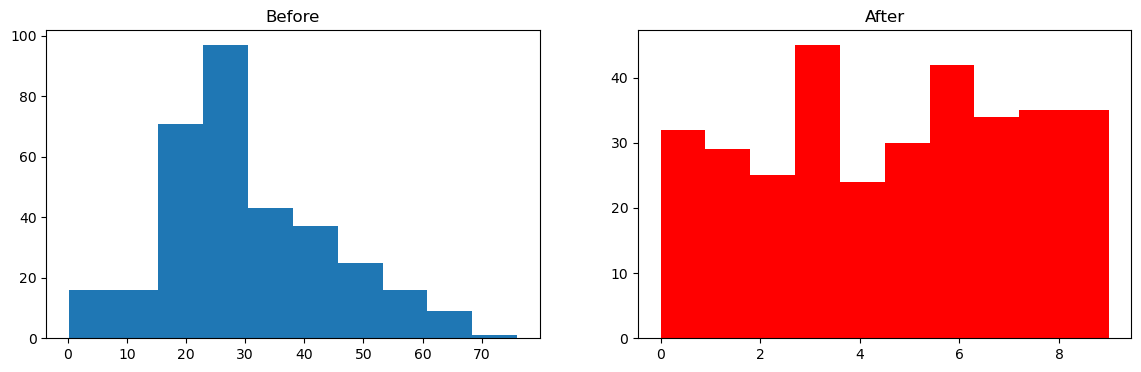

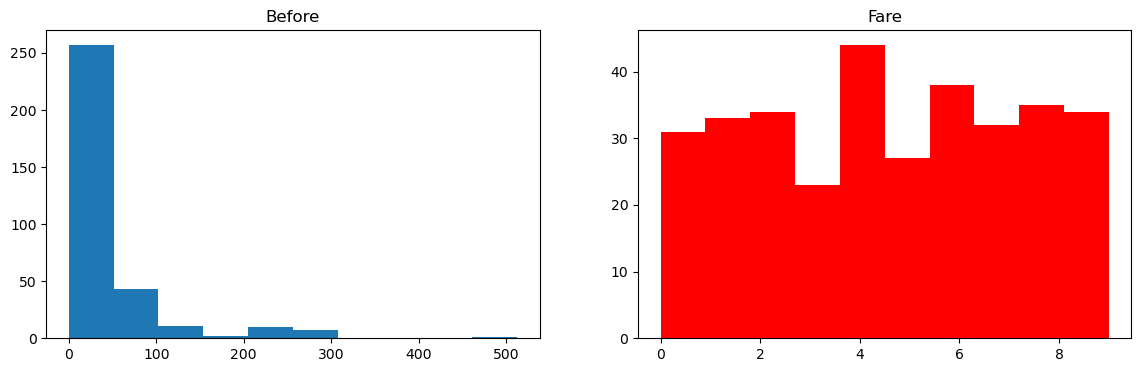

In [31]:
discretize(10, 'quantile')